In [ ]:
import meep as mp
from meep import mpb
import matplotlib.pyplot as plt

In [2]:
num_bands = 4

resolution = 64

N_kpoints = 25

eps1 = 13.
eps2 = 1.

d1 = 0.2
d2 = 0.8

geometry = [mp.Block(center=mp.Vector3(),
                     size=mp.Vector3(d1, mp.inf, mp.inf),
                     material=mp.Medium(epsilon=eps1))]

geometry_lattice = mp.Lattice(size=mp.Vector3(1))

In [ ]:
# calculate bands along (0, ky, 0)
k_points = [mp.Vector3(),
            mp.Vector3(0., 2.5)]

k_points = mp.interpolate(N_kpoints, k_points)

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    default_material=mp.Medium(epsilon=eps2),
                    resolution=resolution)

ms.run_tm()
freqs_tm1 = ms.all_freqs
ky_tm1 = [k.y for k in ms.k_points]

In [ ]:
# calculate bands along (0, ky, π/a)
k_points = [mp.Vector3(0., 0., 1.),
            mp.Vector3(0., 2.5, 1.)]

k_points = mp.interpolate(N_kpoints, k_points)

ms = mpb.ModeSolver(num_bands=num_bands,
                    k_points=k_points,
                    geometry=geometry,
                    geometry_lattice=geometry_lattice,
                    default_material=mp.Medium(epsilon=eps2),
                    resolution=resolution)

ms.run_tm()
freqs_tm2 = ms.all_freqs
ky_tm2 = [k.y for k in ms.k_points]

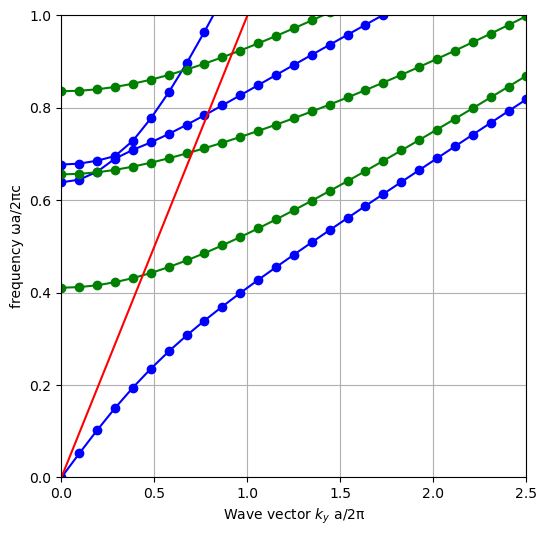

In [9]:
# Superposition of two band structures:
# blue = states along k = (0, ky, 0)
# red = states along k = (0, ky, kz = π/a)
#
plt.figure(figsize=(6,6))
plt.plot(ky_tm1, freqs_tm1, 'bo-', label="TM1")
plt.plot(ky_tm2, freqs_tm2, 'go-', label="TM2")
plt.plot(ky_tm1, ky_tm1, 'r-', label="light line")
plt.xlabel("Wave vector $k_y$ a/2π")
plt.ylabel("frequency ωa/2πc")
plt.xlim(0, 2.5)
plt.ylim(0, 1.0)
plt.grid()

plt.show()